Hello everyone,

In this module, it is required to implement Input/Output utilities for Arabic Font Identification System.

At first, what are the main steps that we should go through in this module?


# TODOs:

1. Understand the problem
2. Read labeled images
3. Read classes names
4. Split data to train and test
5. Testing

In [1]:
##################################################### imports #####################################################
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import randrange

# 1. Understand the problem

The dataset images are arranged in ACdata_base directory, where there exist a subdirectory for each class.
Also, inside ACdata_base, there is a text file 'names.txt' which includes the name of each class.

- Input: dataset path
- Output: images, labels, classes names
- Functions: read_data, split_data, read_classes

# 2. Read Labeled Images

In [2]:
def read_data(dataset_path='./ACdata_base', flags=0, debug=False):
    """ read the dataset from a given path

    Args:
        dataset_path: the path of the dataset directory
        flags: opencv imread flags (default 0)
        debug: print debug data on reading each file (default False)
        
    Returns:
        dataset_images: array contains the dataset images
        dataset_labels: array contains the labels of the dataset images (range: [0, 8])
    """
        
    dataset_images = []
    dataset_labels = []

    for dirname, _, filenames in os.walk(dataset_path):
        for filename in filenames:
            if filename.endswith('.txt'):
                continue
            if debug:
                print('reading: ', os.path.join(dirname, filename))
            img = cv2.imread(os.path.join(dirname, filename), flags)
            dataset_images.append(img)
            dataset_labels.append(int(dirname[-1])-1)
    
    return dataset_images, dataset_labels
            

# 3. Read Classes Names

In [3]:
def read_classes(names_path='./ACdata_base/names.txt'):
    """ read the classes names

    Args:
        names_path: the path of the text files containing the classes names in order

    Returns:
        classes: array contains the name of each class
    """

    classes = []
    with open(names_path) as f:
        for line in f:
            font = line.split('___')[-1].strip()
            classes.append(font)
    return classes

# 4. Split data to train and test

In [4]:
def split_data(X, y, test_size=0.33):
    """ split the data into training and testing data 

    Args:
        X: the data
        y: labels of the data
        test_size: ratio of test size (default 0.33)

    Returns:
        X_train: training data
        X_test: testing data
        y_train: training labels
        y_test: testing labels
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# 5. Testing

In [5]:
def testing():        
    dataset_images, dataset_labels = read_data(dataset_path='../ACdata_base')
    train_images, test_images, train_labels, test_labels = split_data(dataset_images, dataset_labels)
    
    
    assert len(dataset_images) == len(dataset_labels)
    assert len(train_images) == len(train_labels)
    assert len(test_images) == len(test_labels)
    
    classes = read_classes(names_path='../ACdata_base/names.txt')
    print('classes:', classes)
    
    print('labeled images count: ', len(dataset_images))
    print('training set count: ', len(train_images))
    print('testing set count: ', len(test_images))

    random_index = randrange(len(dataset_images))

    plt.imshow(dataset_images[random_index], cmap='gray')
    plt.title('Random Dataset Image of class: ' + classes[dataset_labels[random_index]])
    plt.show()

classes: ['diwani', 'naskh', 'parsi', 'rekaa', 'thuluth', 'maghribi', 'kufi', 'mohakek', 'Squar-kufic']
labeled images count:  1685
training set count:  1128
testing set count:  557


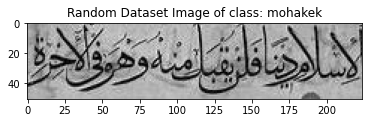

In [6]:
if __name__ == '__main__':
    testing()

In [7]:
def create_py():
    !jupyter nbconvert --to script io_utils.ipynb

In [8]:
if __name__ == '__main__':
    create_py()

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook io_utils.ipynb to script
[NbConvertApp] Writing 4183 bytes to io_utils.py
